# Convolution

In this notebook, we show that infinetly many impulses can approximate an arbitrary input, and thus justify the convolution integral.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import sympy
sympy.init_printing()

The convolution integral can be viewed as the summation of the impulse responses of a linear time invariant system.

$y(t) \approx \sum\limits_{k=0}^{t/\Delta} g(t - k \Delta ) u(k \Delta) \Delta$

As $\Delta \rightarrow 0$, this approaches the integral:

$y(t) = \int_0^t g(t-\sigma) u(\sigma) d\sigma$

where: $\sigma = k \Delta$, and $d\sigma = \Delta$.

### Convolution
$y(t) = (g \otimes u)(t) \equiv \int_0^t g(t-\sigma) u(\sigma) d\sigma$



# Example

### The Differential Equation

$\dot{y}(t) + y(t) = u(t)$

### Laplace Transform

$sY(s) + Y(s) = U(s)$

$(s + 1)Y(s) = U(s)$

$G(s) = Y(s)/U(s) = 1/(s + 1)$


### Impulse Response Function

$g(t) = \mathcal{L}^{-1}[G(s)] = e^{-t}$

### Input Function

$u(t) = \sin(t)$

### Input Laplace Transform

$U(s) = 1/(s^2 +1)$

### Output

$Y(s) = 1/(s^2+1) * 1/(s+1)$

$ \mathcal{L}^{-1}[Y(s)] = \frac{1}{2} \left(e^{-t} + sin(t) - cos(t)\right)$


In [2]:
def g(t):
    """The impulse response of the differential equation."""
    return np.exp(-t)

def u(t):
    return np.sin(t)

def delayed_impulse_response(g, t, t0):
    return g(t-t0)*(t>t0)

def ydot(y, u):
    """The differential equation."""
    return -y + u

In [3]:
def sim(dt_impulse):
    tf = 10
    dt = 0.001

    t = np.arange(0, tf + dt, dt)
    y = t*0
    hits = t*0
    y_analytic = np.exp(-t)/2 + (np.sin(t) - np.cos(t))/2
    y_euler = t*0
    yi_euler = 0
    t_last_pulse = 0
    u_true = u(t)

    for i, t0 in enumerate(t):
        if (t0 - t_last_pulse) >= dt_impulse:
            t_last_pulse = t0
            A = u_true[i]*dt_impulse
            hits[i] = A
            y += A*delayed_impulse_response(g, t, t0)
        yi_euler += dt*ydot(yi_euler, u_true[i])
        y_euler[i] = yi_euler
    
    return {
        't': t,
        'hits': hits,
        'u_true': u_true,
        'y': y,
        'y_analytic': y_analytic,
        'y_euler': y_euler
    }

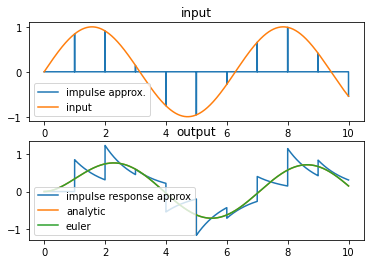

In [4]:
def do_plot():
    
    data = sim(1)
    
    plt.figure()

    plt.subplot(211)
    plt.title('input')
    plt.plot(data['t'], data['hits'], label='impulse approx.')
    plt.plot(data['t'], data['u_true'], label='input')
    plt.legend()

    plt.subplot(212)
    plt.title('output')
    plt.plot(data['t'], data['y'], label='impulse response approx')
    plt.plot(data['t'], data['y_analytic'], label='analytic')
    plt.plot(data['t'], data['y_euler'], label='euler')
    plt.legend()
    
do_plot()

In [5]:
def make_movie():
    data = sim(1)

    fig = plt.figure(figsize=(10, 10))

    ax = plt.subplot(211)
    plt.title('input')
    h_hits, = plt.plot(data['t'], data['hits'], label='impulse approx.')
    plt.plot(data['t'], data['u_true'], label='input')
    plt.legend()

    ax = plt.subplot(212)
    plt.title('output')
    h_y, = plt.plot(data['t'], data['y'], label='impulse response approx')
    plt.plot(data['t'], data['y_analytic'], label='analytic')
    plt.plot(data['t'], data['y_euler'], label='euler')
    plt.legend()

    # initialization function: plot the background of each frame
    def init():
        h_hits.set_data([], [])
        h_y.set_data([], [])
        return (h_hits, h_y,)

    # animation function. This is called sequentially
    def animate(i):
        dt_impulse = 1 - 0.01*i
        if dt_impulse < 0.01:
            dt_impulse = 0.01
        data = sim(dt_impulse)
        h_hits.set_data(data['t'], data['hits'])
        h_y.set_data(data['t'], data['y'])
        return (h_hits, h_y,)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=100, interval=100, blit=True)
    plt.close()
    return anim

anim = make_movie()
anim.save('convolution.mp4')
HTML(anim.to_html5_video())

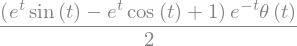

In [6]:
def find_inv_laplace():
    t = sympy.symbols('t', real=True)
    s= sympy.symbols('s', complex=True)
    return sympy.inverse_laplace_transform(1/(s+1)*1/(s**2+1), s, t)

find_inv_laplace()

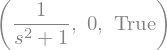

In [7]:
def find_laplace():
    t = sympy.symbols('t', real=True)
    s= sympy.symbols('s', complex=True)
    return sympy.laplace_transform(sympy.sin(t), t, s)

find_laplace()